In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler

# About the Dataset


This dataset contains information related to food wastage patterns across various countries and food categories. The data highlights how much food is wasted (in tons), its associated economic loss, and other socio-economic and demographic factors.

# Description


Country: The country where the food wastage data is collected.

Year: The year in which the data was recorded.

Food Category: The category/type of food (e.g., Fruits & Vegetables, Dairy Products, Prepared Food, Beverages).

Total Waste (Tons): The total amount of food wasted in tons.

Economic Loss (Million $): The estimated economic loss due to the food waste, measured in millions of dollars.

Avg Waste per Capita (Kg): The average food waste per person, measured in kilograms.

Population (Million): The total population of the country, in millions.

Household Waste (%): The percentage of food waste that comes from households.

# Target variable


Target variable: Amount of food wastage (in tons or percentage)

In [ ]:
# Load the dataset
df = pd.read_csv('/content/global_food_wastage_dataset.csv')
df

,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64
1,Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61
2,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08
3,France,2023,Fruits & Vegetables,46299.69,40551.22,120.19,953.05,31.91
4,France,2023,Beverages,33096.57,36980.82,104.74,1105.47,36.06
...,...,...,...,...,...,...,...,...
4995,France,2021,Beverages,47524.74,48058.40,77.41,1087.46,39.73
4996,Australia,2021,Beverages,32337.72,32705.08,194.35,1336.32,64.83
4997,China,2018,Meat & Seafood,20640.96,22485.33,21.04,16.13,31.23
4998,Australia,2021,Beverages,26566.64,29357.57,197.14,1086.17,69.95


In [ ]:
# first and last few  rows of the dataset
df.head()
df.tail()

,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
4995,France,2021,Beverages,47524.74,48058.40,77.41,1087.46,39.73
4996,Australia,2021,Beverages,32337.72,32705.08,194.35,1336.32,64.83
4997,China,2018,Meat & Seafood,20640.96,22485.33,21.04,16.13,31.23
4998,Australia,2021,Beverages,26566.64,29357.57,197.14,1086.17,69.95
4999,France,2024,Bakery Items,8860.27,7360.38,51.50,879.67,54.27


In [ ]:
# column names of the dataset
df.columns

Index(['Country', 'Year', 'Food Category', 'Total Waste (Tons)',
       'Economic Loss (Million $)', 'Avg Waste per Capita (Kg)',
       'Population (Million)', 'Household Waste (%)'],
      dtype='object')

In [ ]:
# understand the above data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    5000 non-null   object 
 1   Year                       5000 non-null   int64  
 2   Food Category              5000 non-null   object 
 3   Total Waste (Tons)         5000 non-null   float64
 4   Economic Loss (Million $)  5000 non-null   float64
 5   Avg Waste per Capita (Kg)  5000 non-null   float64
 6   Population (Million)       5000 non-null   float64
 7   Household Waste (%)        5000 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 312.6+ KB


In [ ]:
print(df.isnull().sum())

Country                      0
Year                         0
Food Category                0
Total Waste (Tons)           0
Economic Loss (Million $)    0
Avg Waste per Capita (Kg)    0
Population (Million)         0
Household Waste (%)          0
dtype: int64


# Data cleaning

In [ ]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [ ]:
df['Country'].unique()

array(['Australia', 'Indonesia', 'Germany', 'France', 'India', 'China',
       'UK', 'South Africa', 'Japan', 'USA', 'Brazil', 'Saudi Arabia',
       'Italy', 'Spain', 'Mexico', 'Argentina', 'Canada', 'South Korea',
       'Russia', 'Turkey'], dtype=object)

In [ ]:
df.duplicated().value_counts()

,count
False,5000


In [ ]:
# rename the columns
df.columns = (
    df.columns
    .str.lower()
    .str.replace(" ", "_")
    .str.replace(r"[()$]", "", regex=True)
)
df.columns

Index(['country', 'year', 'food_category', 'total_waste_tons',
       'economic_loss_million_', 'avg_waste_per_capita_kg',
       'population_million', 'household_waste_%'],
      dtype='object')

# descriptive statistics

In [ ]:
df.describe()

,year,total_waste_tons,economic_loss_million_,avg_waste_per_capita_kg,population_million,household_waste_%
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2021.015600,25061.780072,25039.703870,109.46397,706.606416,50.060890
std,1.999239,14245.119588,14620.236429,51.93373,402.546464,11.596203
min,2018.000000,502.610000,406.690000,20.09000,11.290000,30.020000
25%,2019.000000,12783.737500,12612.477500,64.05000,350.602500,40.012500
50%,2021.000000,24865.220000,24428.155000,110.08000,713.530000,50.295000
75%,2023.000000,37471.035000,37146.037500,154.52500,1057.255000,60.125000
max,2024.000000,49990.760000,59228.930000,199.97000,1399.970000,70.000000


In [ ]:
df_num = df.select_dtypes(include='number') # Selects only numeric columns
df_num.corr() # Computes correlation matrix

,year,total_waste_tons,economic_loss_million_,avg_waste_per_capita_kg,population_million,household_waste_%
year,1.000000,0.003452,0.002113,0.013716,0.008015,-0.013416
total_waste_tons,0.003452,1.000000,0.974522,0.019987,0.024048,0.010367
economic_loss_million_,0.002113,0.974522,1.000000,0.017097,0.022253,0.006167
avg_waste_per_capita_kg,0.013716,0.019987,0.017097,1.000000,-0.029190,-0.019394
population_million,0.008015,0.024048,0.022253,-0.029190,1.000000,-0.004848
household_waste_%,-0.013416,0.010367,0.006167,-0.019394,-0.004848,1.000000


total waste tons & economic loss million have really high correlation with 0.974522

#**`Data Visualization`**

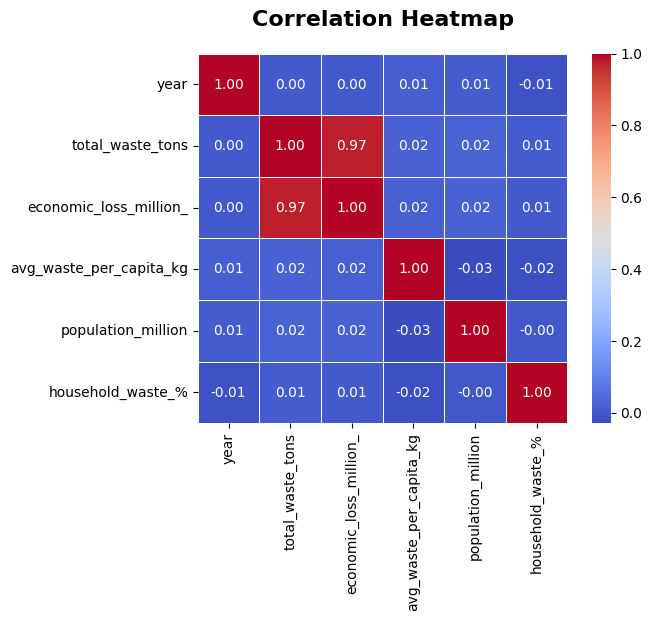

In [ ]:
sns.heatmap(
    df_num.corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    square=True
)
plt.title("Correlation Heatmap", fontsize=16, weight='bold', pad=20)
plt.show()

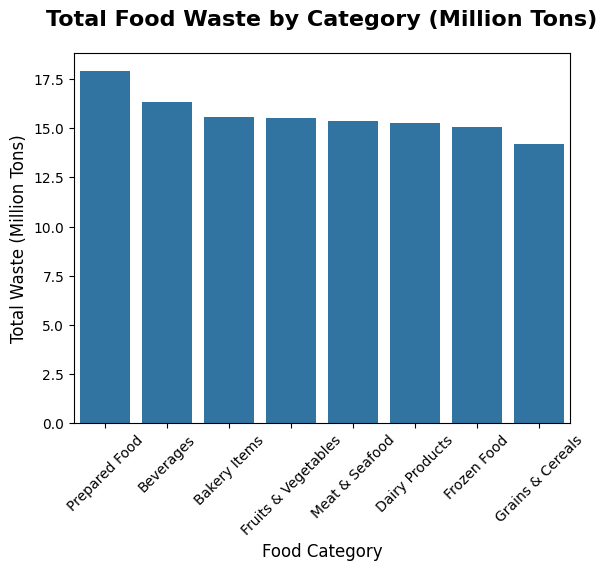

In [ ]:
waste_food = (df.groupby('food_category')['total_waste_tons'].sum() / 1000000).round(2).sort_values(ascending=False)

# Convert Series to DataFrame for proper plotting
waste_food_df = waste_food.reset_index()

sns.barplot(data=waste_food_df, x='food_category', y='total_waste_tons')

plt.title("Total Food Waste by Category (Million Tons)", fontsize=16, weight='bold', pad=20)
plt.xlabel("Food Category", fontsize=12)
plt.ylabel("Total Waste (Million Tons)", fontsize=12)

# Rotate category names for better readability
plt.xticks(rotation=45)

plt.show()

<ipython-input-20-95ec51786d54>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


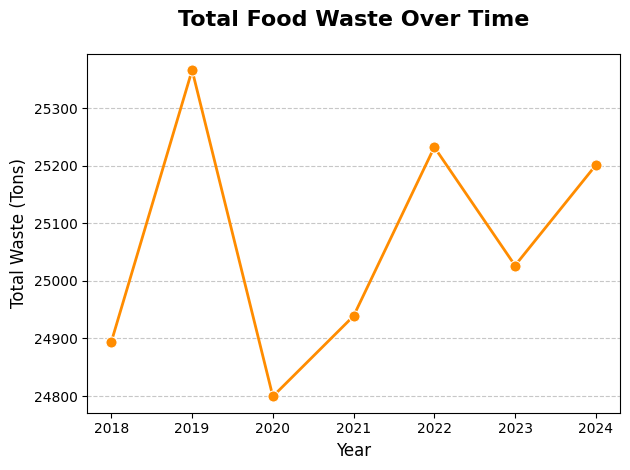

In [ ]:
sns.lineplot(
    data=df,
    x='year',
    y='total_waste_tons',
    marker='o',
    color='darkorange',
    linewidth=2,
    markersize=8,
    ci=None
)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Waste (Tons)', fontsize=12)
plt.title('Total Food Waste Over Time', fontsize=16, weight='bold', pad=20)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Covid-19 decreased food waste

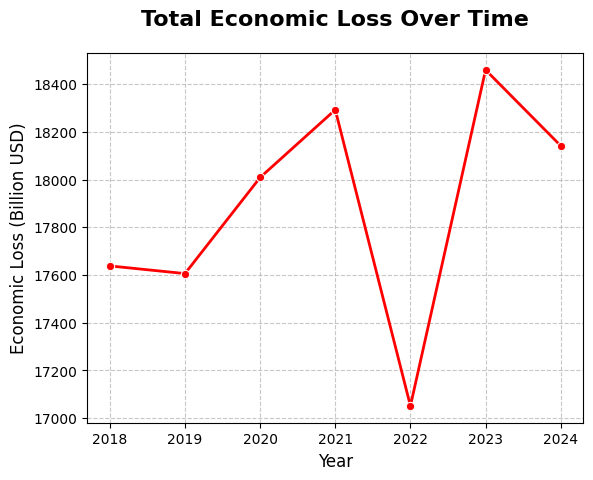

In [ ]:
loss_economy_year = (df.groupby('year')['economic_loss_million_'].sum() / 1_000).round(2)

# Convert the Series to a DataFrame
loss_economy_year = loss_economy_year.reset_index()

# Now use the DataFrame in sns.lineplot
sns.lineplot(data=loss_economy_year,  # Pass the DataFrame here
             x='year',              # Specify x-axis column
             y='economic_loss_million_',  # Specify y-axis column
             marker='o',
             linewidth=2,
             color='red')

plt.title("Total Economic Loss Over Time", fontsize=16, weight='bold', pad=20)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Economic Loss (Billion USD)", fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

<ipython-input-22-3280d59a5d0d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_waste,


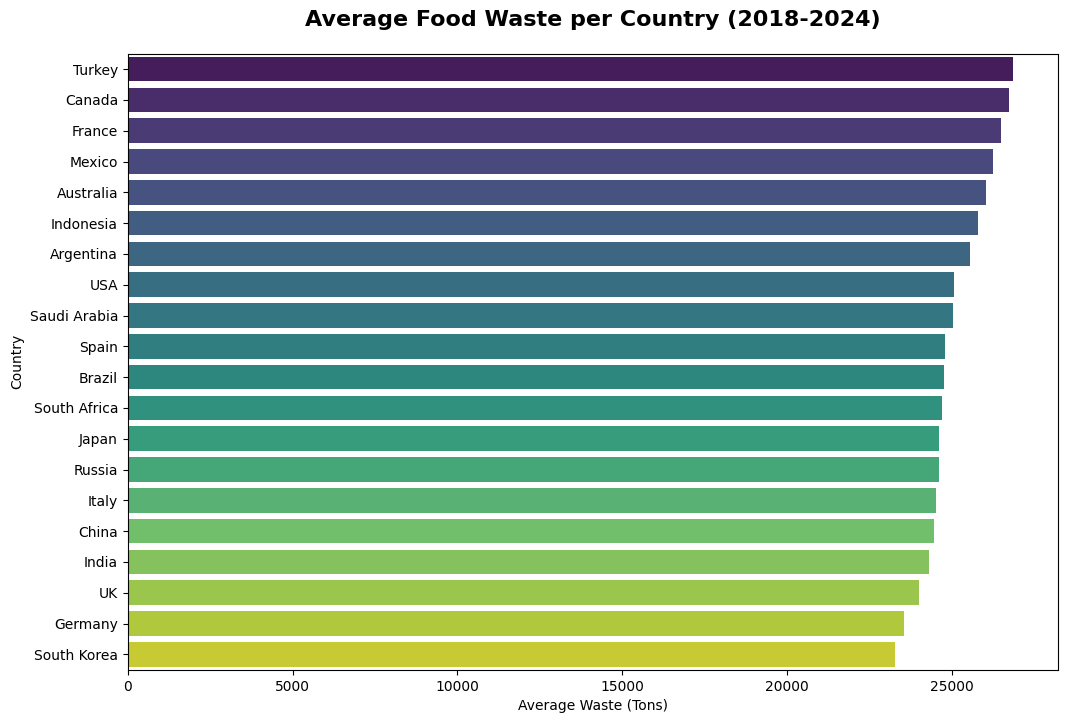

In [ ]:
# Calculate the mean food waste per country
mean_waste = df.groupby('country')['total_waste_tons'].mean().reset_index().sort_values(by='total_waste_tons',ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=mean_waste,
            x='total_waste_tons',
            y='country',
            palette='viridis')

plt.title("Average Food Waste per Country (2018-2024)", fontsize=16, weight='bold', pad=20)
plt.xlabel("Average Waste (Tons)")
plt.ylabel("Country")

plt.show()

<ipython-input-23-541e7820d9e6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_loss.reset_index(), y='country', x='economic_loss_million_', palette='viridis')


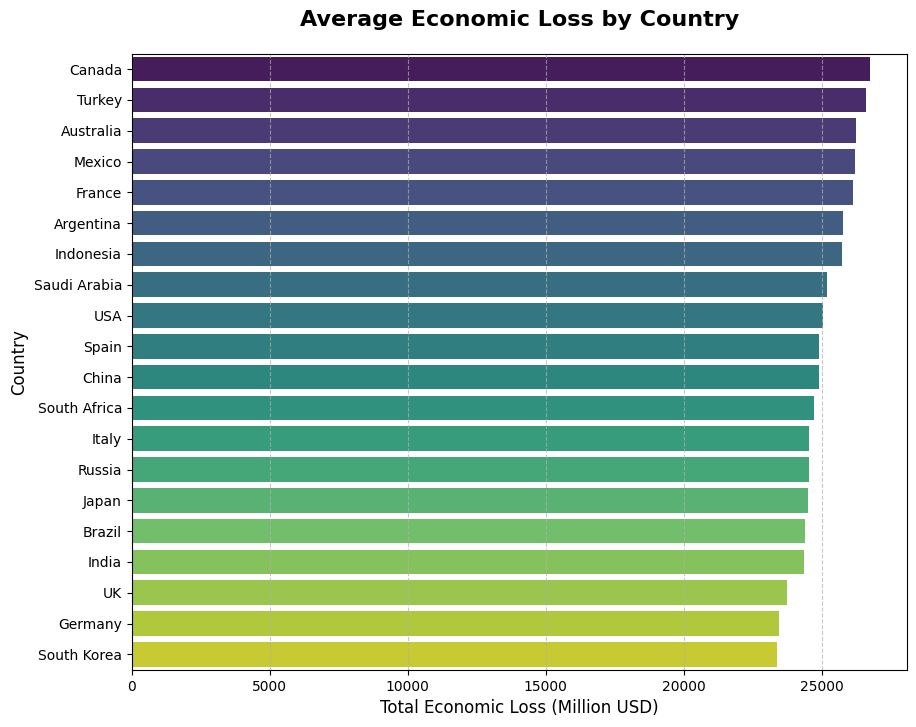

In [ ]:
country_loss = df.groupby('country')['economic_loss_million_'].mean().round(2).sort_values(ascending=False)

# Convert to billions if needed
if country_loss.max() > 1_000_000:
    country_loss = country_loss / 1_000_000
    unit = "Billion USD"
else:
    unit = "Million USD"


plt.figure(figsize=(10, 8))
sns.barplot(data=country_loss.reset_index(), y='country', x='economic_loss_million_', palette='viridis')

plt.title("Average Economic Loss by Country", fontsize=16, weight='bold', pad=20)
plt.ylabel("Country", fontsize=12)
plt.xlabel(f"Total Economic Loss ({unit})", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

Country with the smallest average food waste also has the smallest economic loss.

<ipython-input-24-ba5ffeadf348>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
<ipython-input-24-ba5ffeadf348>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
<ipython-input-24-ba5ffeadf348>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
<ipython-input-24-ba5ffeadf348>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
<ipython-input-24-ba5ffeadf348>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
<ipython-input-24-ba5ffeadf348>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
<ipython-input-24-ba5ffeadf348>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.li

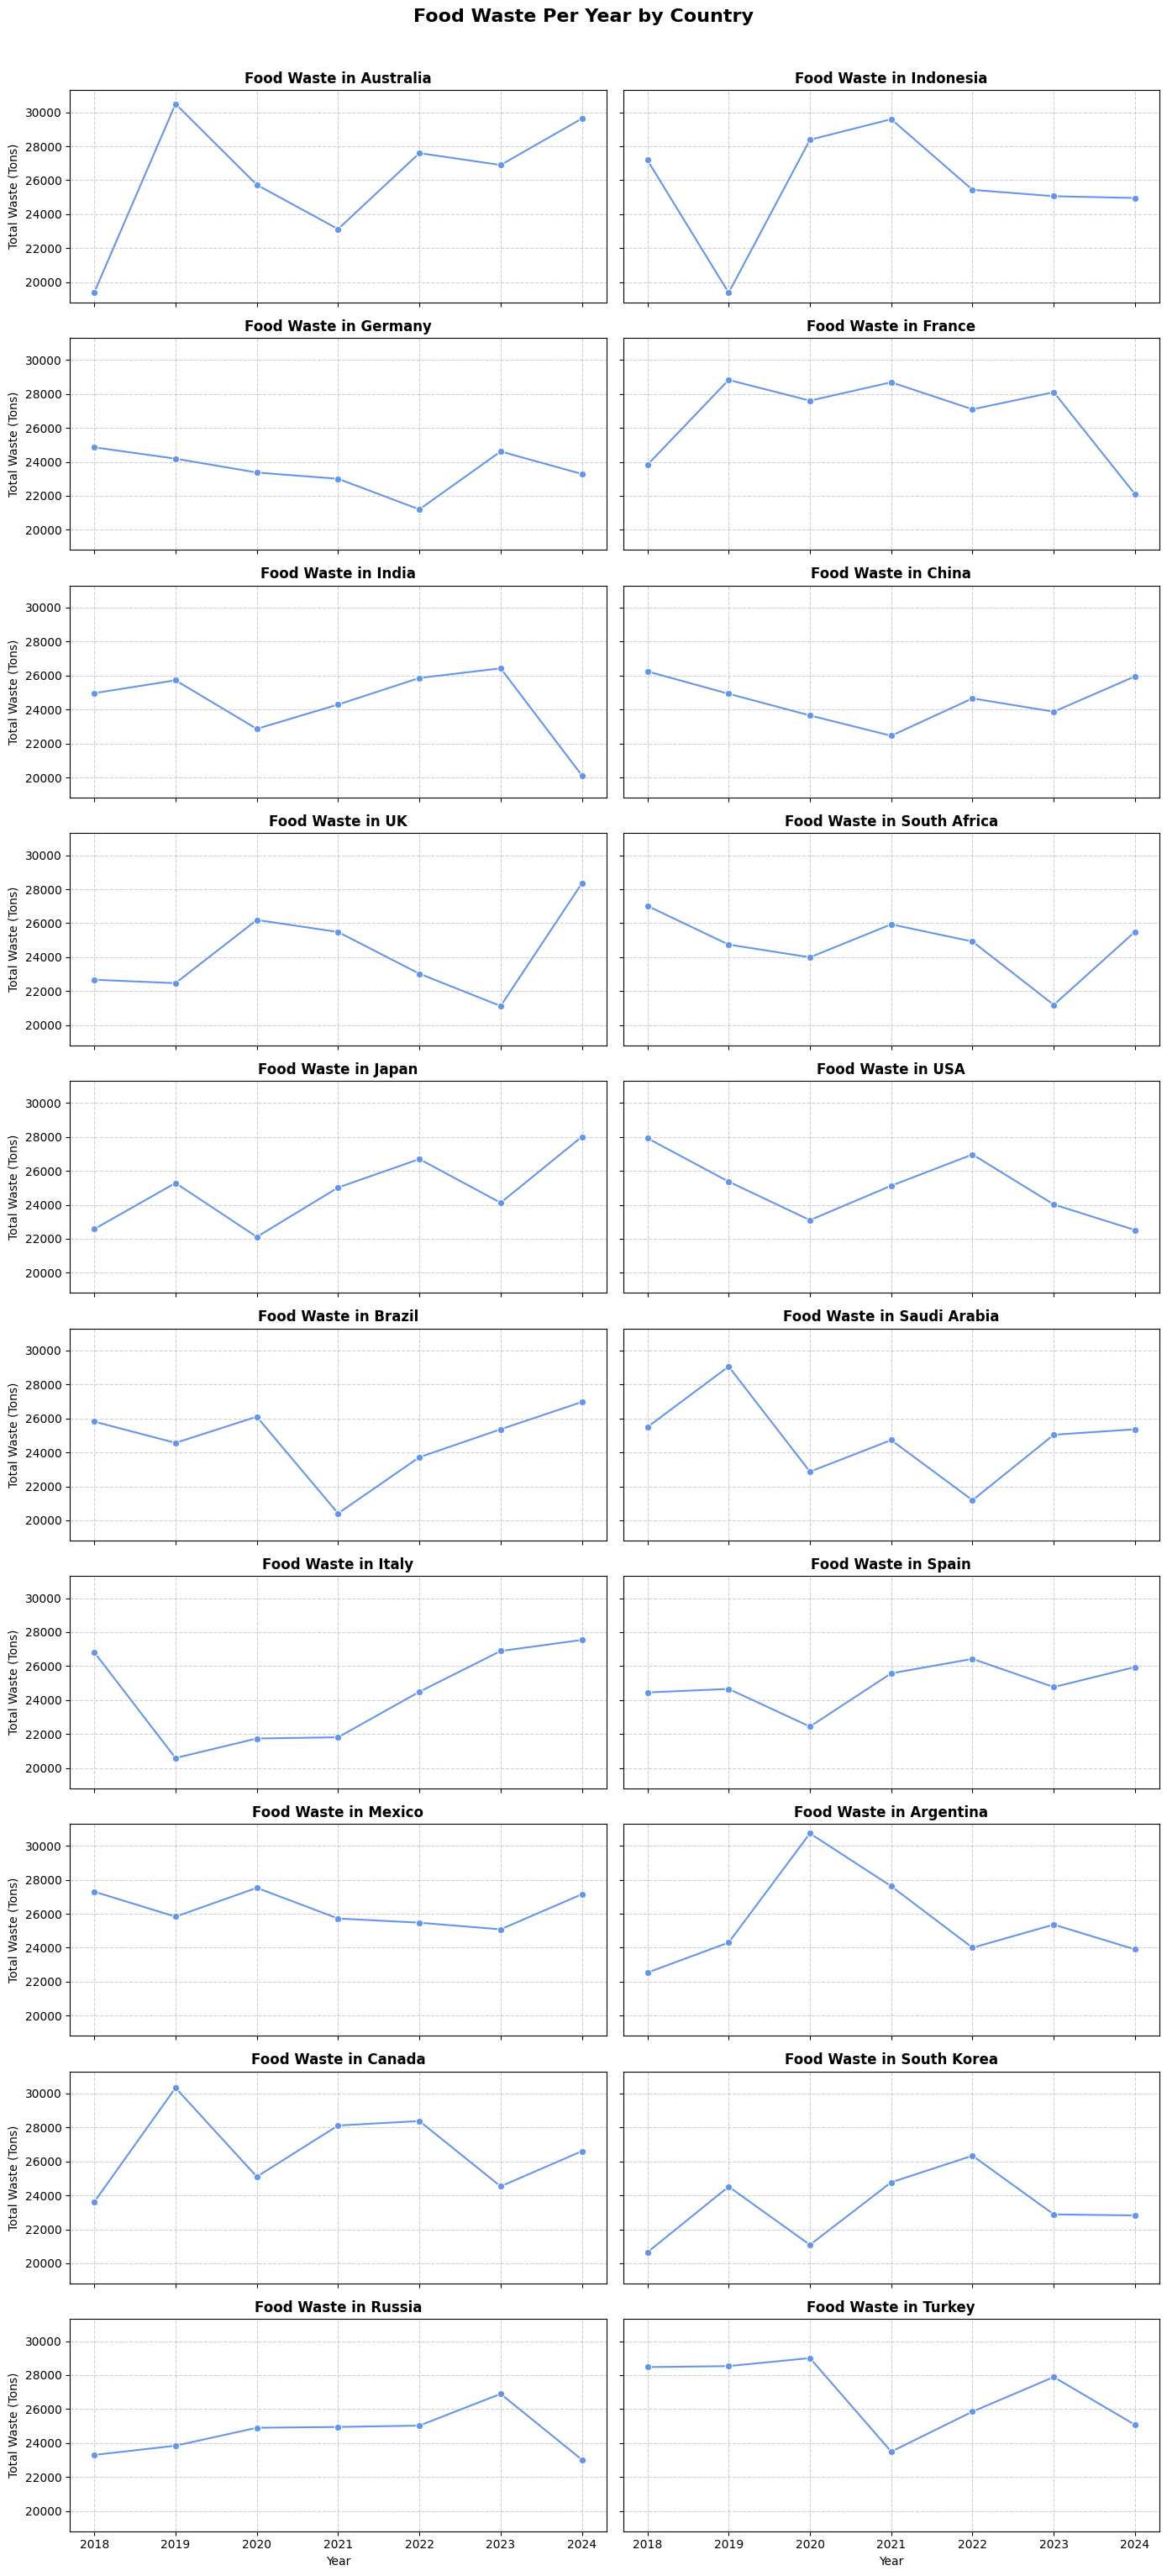

In [ ]:
countries = df['country'].unique()
rows = (len(countries) + 1) // 2

fig, axes = plt.subplots(rows, 2, figsize=(14, rows * 3), sharex=True, sharey=True)

for ax, country in zip(axes.flatten(), countries):
    sns.lineplot(
        data=df[df['country'] == country],
        x='year',
        y='total_waste_tons',
        marker='o',
        color='cornflowerblue',
        ax=ax,
        ci=None
    )
    ax.set_title(f"Food Waste in {country}", fontsize=12, weight='bold')
    ax.set_xlabel("Year")
    ax.set_ylabel("Total Waste (Tons)")
    ax.tick_params(axis='x')
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.suptitle("Food Waste Per Year by Country", fontsize=16, weight='bold', y=1.02)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

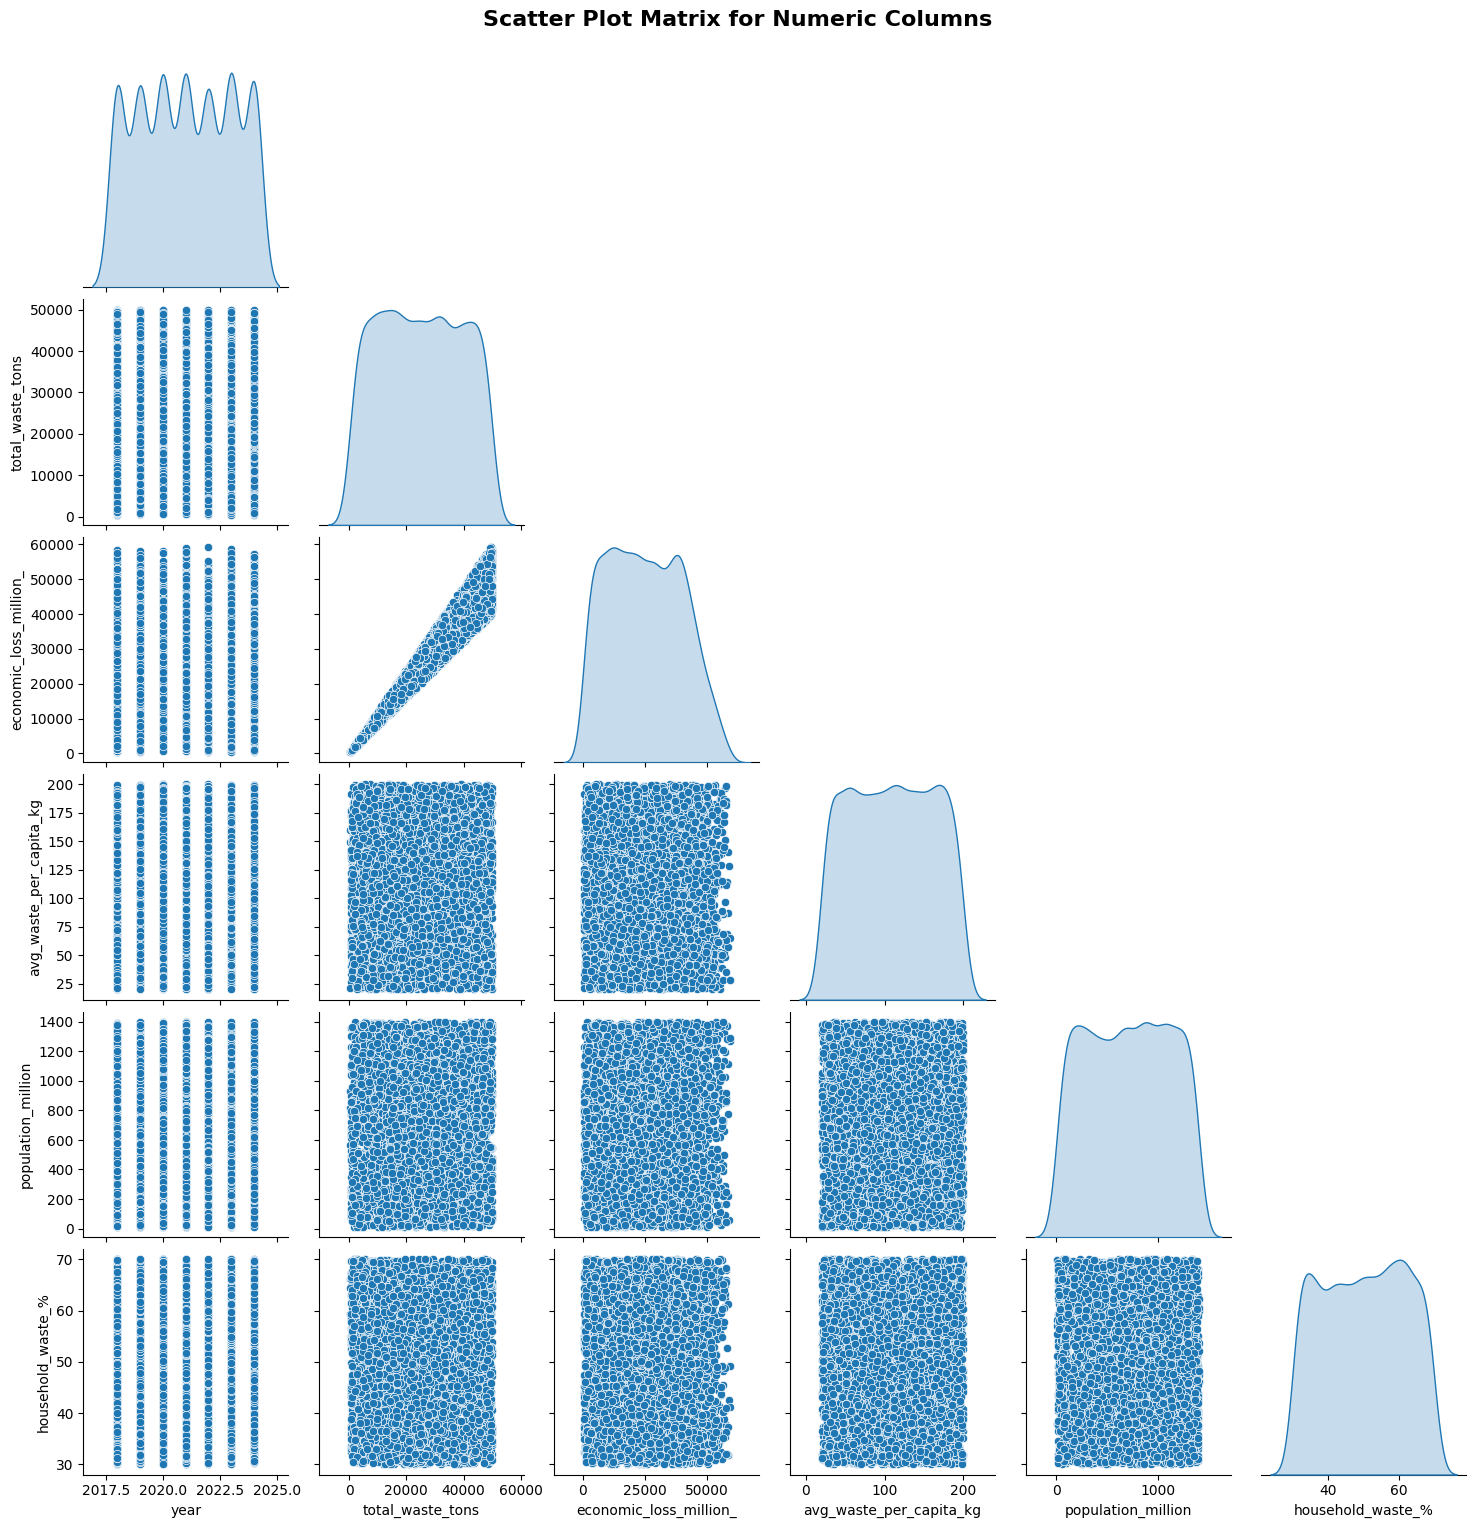

In [ ]:
sns.pairplot(df_num, diag_kind='kde', corner=True)
plt.suptitle("Scatter Plot Matrix for Numeric Columns",
             y=1.02,
             fontsize=16,
             weight='bold')
plt.show

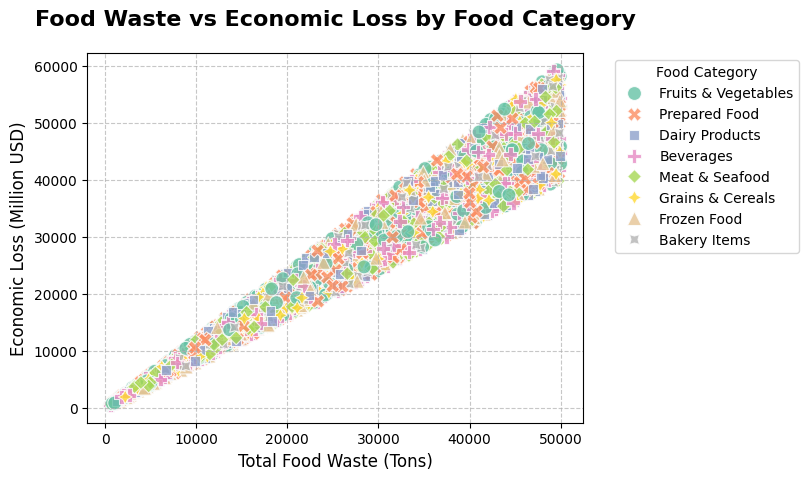

In [ ]:
import seaborn as sns
sns.scatterplot(
    data=df,
    x='total_waste_tons',
    y='economic_loss_million_',
    hue='food_category',
    style='food_category',
    palette='Set2',
    s=100,
    alpha=0.8
)

plt.title("Food Waste vs Economic Loss by Food Category", fontsize=16, weight='bold', pad=20)
plt.xlabel("Total Food Waste (Tons)", fontsize=12)
plt.ylabel("Economic Loss (Million USD)", fontsize=12)
plt.legend(title="Food Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

we can user simple linear regression to predict economic loss (million) with total waste

<ipython-input-27-282060ef31f6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,


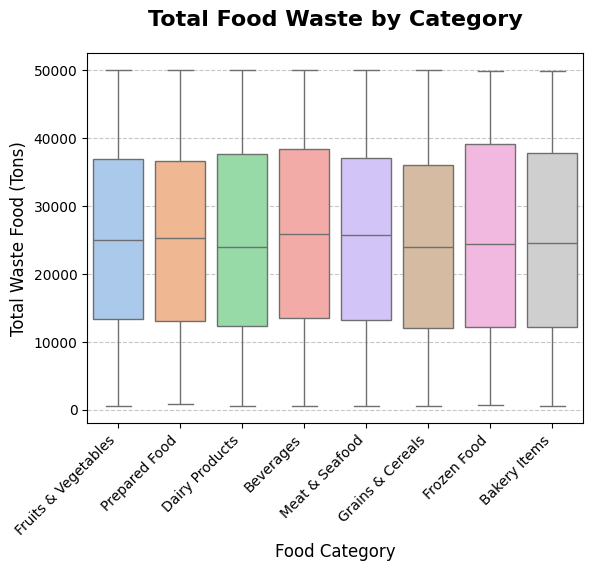

In [ ]:
sns.boxplot(data=df,
            x='food_category',
            y='total_waste_tons',
            palette='pastel')

plt.title('Total Food Waste by Category', fontsize=16, weight='bold', pad=20)
plt.xlabel('Food Category', fontsize=12)
plt.ylabel('Total Waste Food (Tons)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# Data Prediction

In [ ]:
# Prepare x and y
x = df['total_waste_tons'].array.reshape(-1, 1)
y = df['economic_loss_million_']

# Scale the data
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# Split the data
x_train,x_test,y_train,y_test = train_test_split(x_scaled,
                                                y,
                                                test_size=0.3,
                                                random_state=123)

In [ ]:
# Create a model
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(x_test)

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 2477.10
Root Mean Squared Error (RMSE): 3288.69
R² Score: 0.95


- The model explains 95% of the variation in food waste.

- 5% remains unexplained due to factors outside the data.

- Mean Absolute Error (MAE): 2477.10 tons (average prediction error).

- Root Mean Squared Error (RMSE): 3288.69 tons (shows larger but infrequent errors).


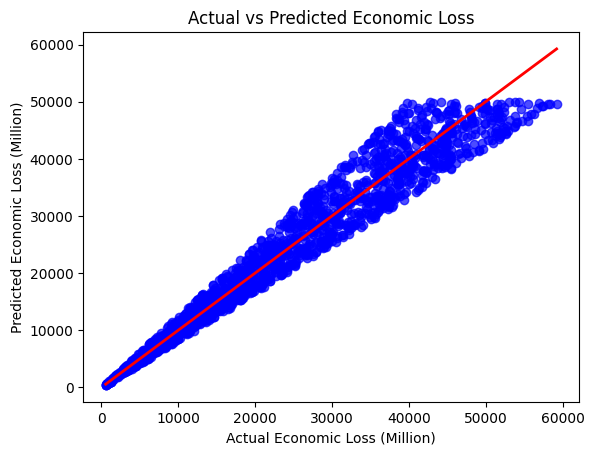

In [ ]:
# Scatter plot: Actual vs Predicted
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_test),
          max(y_test)],
         [min(y_test),
          max(y_test)],
         color='red',
         linewidth=2)
plt.xlabel("Actual Economic Loss (Million)")
plt.ylabel("Predicted Economic Loss (Million)")
plt.title("Actual vs Predicted Economic Loss")
plt.show()

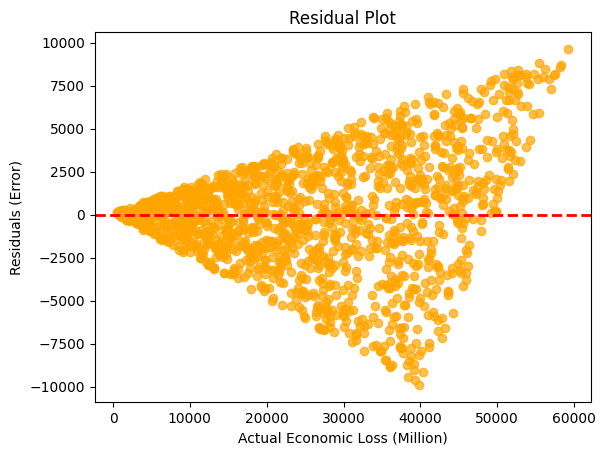

In [ ]:
# Residual plot
plt.scatter(y_test,
            y_test - y_pred,
            color='orange',
            alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Economic Loss (Million)")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot")
plt.show()

- The model shows heteroscedasticity (errors are not consistent).

- Larger economic losses lead to bigger prediction errors.

- The model struggles to predict high values accurately.